<a href="https://colab.research.google.com/github/patty-gz02/Regresion-Lineal/blob/main/IA_Regresion_Simple_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload= files.upload()

Saving notas_academicas.csv to notas_academicas.csv


In [ ]:
import matplotlib.pyplot as plt #graficos
import numpy as np #matrices
import pandas as pd #regresion

In [ ]:
datos=pd.read_csv("notas_academicas.csv")
print(datos.head())

   PorcentajeAsistencia  Nota
0                  0.85    18
1                  0.85    17
2                  0.90    18
3                  0.75    17
4                  0.90    17


<Axes: xlabel='PorcentajeAsistencia'>

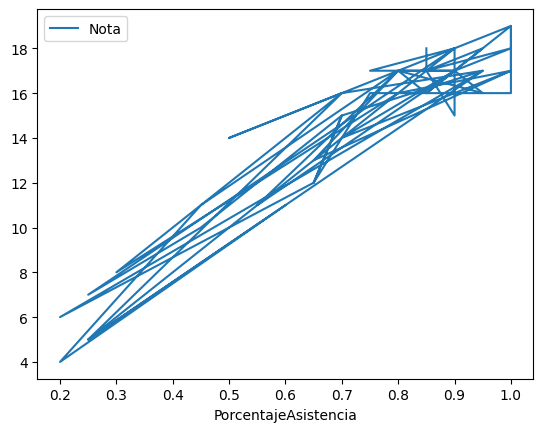

In [ ]:
#ver graficamente los 50 datos
datos.plot(x='PorcentajeAsistencia', y='Nota')

<Axes: xlabel='PorcentajeAsistencia', ylabel='Nota'>

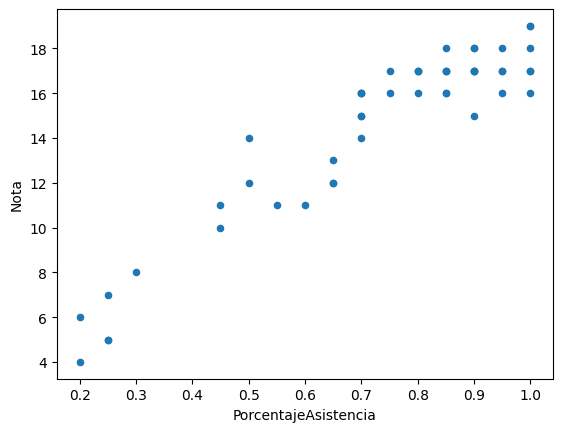

In [ ]:
datos.plot(x='PorcentajeAsistencia', y='Nota',kind='scatter') # biblioteca matplotlib que se utiliza para dibujar un gráfico de dispersión

In [ ]:
#determinar parametros para ver sus valores
x=datos.values[:,0]
y=datos.values[:,1]

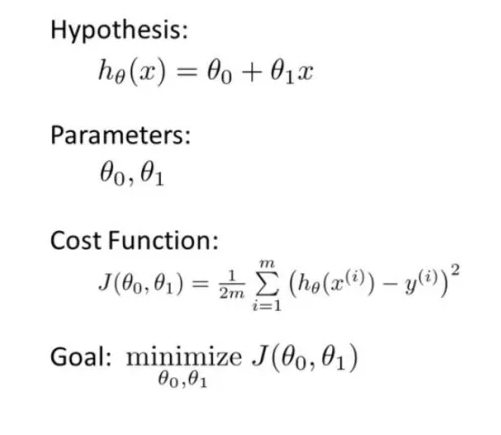

In [ ]:
#hallamos la regresion lineal con 1 parametro (usamos formula de costos)

def CalcularCosto(x,y,beta):
  m=len(y) #cant elementos
  j=0#costo
  #costo de todos los elementos
  for i in range (m):
    j=j+(beta*x[i]-y[i])**2  #hipotesis: beta*x[i]   prediccion: y[i]
    return j/(2*m)


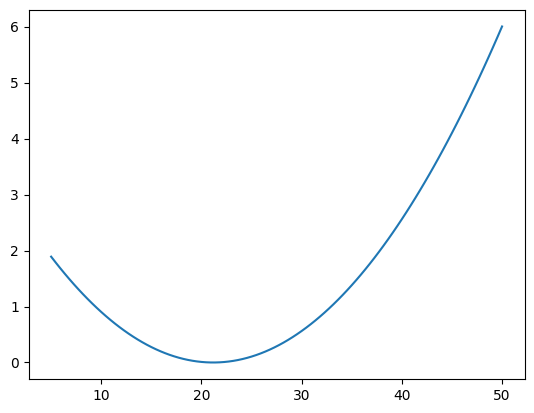

In [ ]:
#Calculo de los valores de costo para formar el grafico, funcion convexa

# Crea una lista vacía para almacenar los valores de la función de costo.
c = []
b = []

# Recorre los valores de la variable independiente (`i`) desde 5 hasta 50, en incrementos de 0.5.
for i in np.linspace(5, 50, 100):#calcular parametros, 5,50 (cant iteraciones) 100 (proporcion) son valores que se le asignan

  # Calcula el valor de la función de costo para el valor actual de `i`.
  c.append(CalcularCosto(x, y, i)) #agregar valores a una lista

  # Agrega el valor actual de `i` a la lista `b`.
  b.append(i)

# Dibuja un gráfico de líneas con los valores de la lista `b` en el eje x y los valores de la lista `c` en el eje y.
plt.plot(b, c)


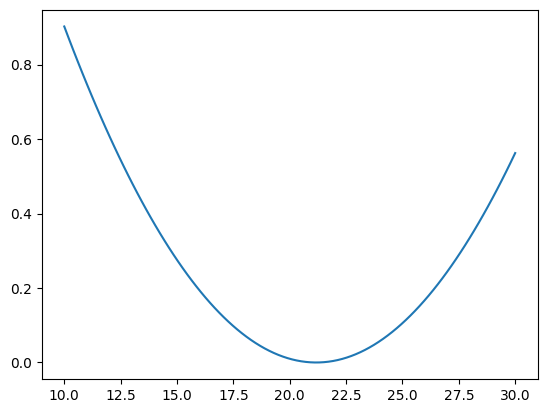

In [ ]:
c=[]
b=[]
for i in np.linspace(10,30,100):
  c.append(CalcularCosto(x,y,i))
  b.append(i)
plt.plot(b,c)

In [ ]:
#algoritmo gradiente

def GradienteDescendente(x,y,beta,alpha, num_iters):
  m=len(y)#cant elementos
  bh=np.zeros(num_iters)#calcular puntos a plotear
  jh=np.zeros(num_iters)#funcion zero
  for iter in range(num_iters):
    s=0
    for i in range(m):
      s=s+((beta*x[i])-y[i])*x[i]
      beta=beta-(alpha/m)*s
      jh[iter]=CalcularCosto(x,y,beta)
      bh[iter]=beta
  return (beta,jh,bh)

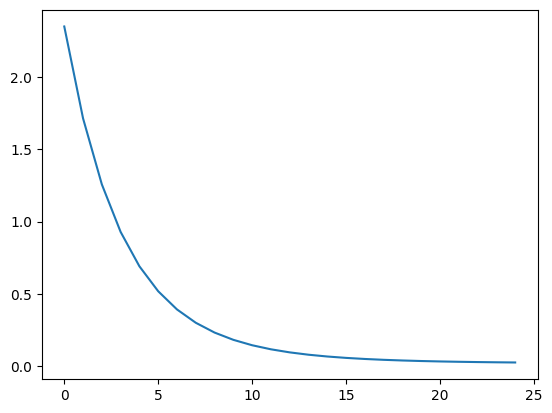

In [ ]:
beta_inicial=0
max_iter=25
alpha=0.01

(beta_final,jh,bh)=GradienteDescendente(x,y,beta_inicial,alpha,max_iter)
plt.plot(jh)

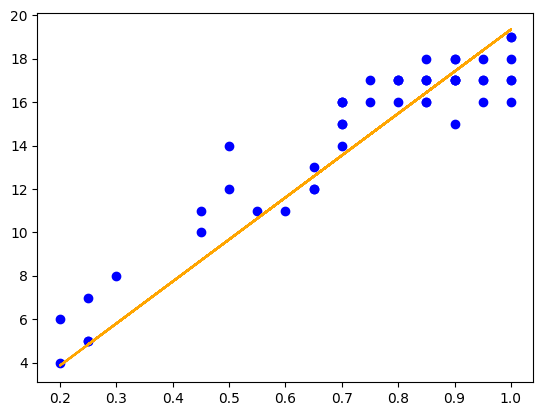

In [ ]:
plt.scatter(x,y,color="blue")
yp=x*beta_final
plt.plot(x,yp,color="orange")

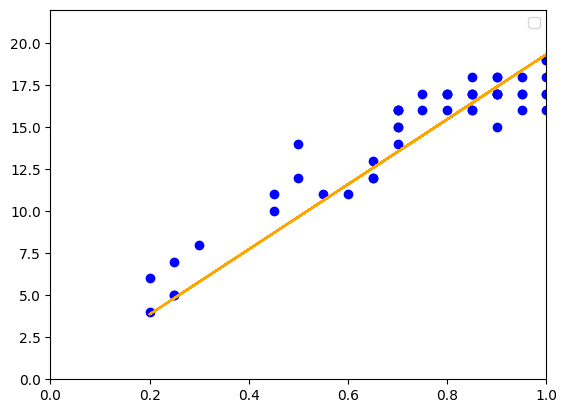

In [ ]:
plt.scatter(x,y,color="blue")
yp=x*beta_final
plt.plot(x,yp,color="orange")
plt.xlim((0,1))
plt.ylim((0,22))
plt.legend()

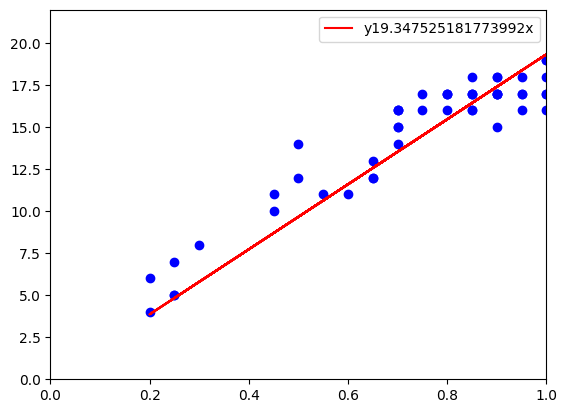

In [ ]:
plt.scatter(x,y,color="blue")
yp=x*beta_final
plt.plot(x,yp,color="red",label="y{}x".format(beta_final))
plt.xlim((0,1))
plt.ylim((0,22))
plt.legend()

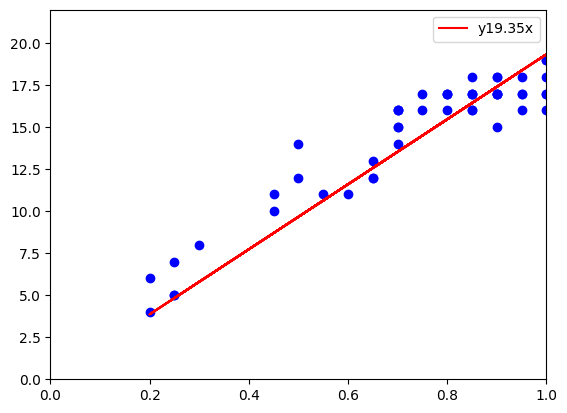

In [ ]:
plt.scatter(x,y,color="blue")
yp=x*beta_final
plt.plot(x,yp,color="red",label="y{:.2f}x".format(beta_final)) #cantidad de decimales que veremos en la legenda :.2f (en multiple afecta)
plt.xlim((0,1))
plt.ylim((0,22))
plt.legend()

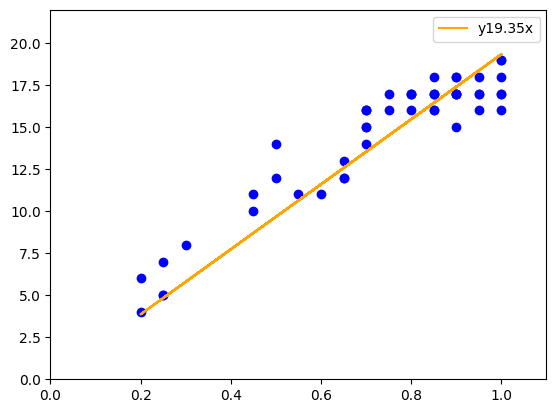

In [ ]:
plt.scatter(x,y,color="blue")
yp=x*beta_final
plt.plot(x,yp,color="orange",label="y{:.2f}x".format(beta_final)) #cantidad de decimales que veremos en la legenda :.2f (en multiple afecta)
plt.xlim((0,1.1)) #con el 1.1 se desvio
plt.ylim((0,22))
plt.legend()

In [ ]:
#CALCULAR EL COEFICIENTE DE DETERMINACION R**2

ypromedio=np.mean(y)
SSres=np.sum(y-yp) #distancia
SStot=np.sum((y-ypromedio)**2)
R2=1-(SSres/SStot)
R2

0.9737606691967947

<h1>REGRESION MULTIPLE<H1>


In [ ]:
def CalcularCosto2(x,y,beta):
  m=len(y)#calcular cant datos de un solo vector
  j=0 #simulacion del vector
  for i in range(m):
    j=j+((beta[0]+beta[1]*x[i])-y[i])**2 #La parte beta[0] de la hipótesis es el intercepto, y la parte beta[1] de la hipótesis es la pendiente.
  return j/(2*m)

In [ ]:
costo=np.array([
                [i,j,CalcularCosto2(x,y,[i,j])]
                for i in np.linspace(-100,100,25) for j in np.linspace(-100,100,25)
              ])

In [ ]:
costo[0]

array([ -100.  ,  -100.  , 17968.72])

In [ ]:
costo[-1]

array([  100.  ,   100.  , 12764.32])

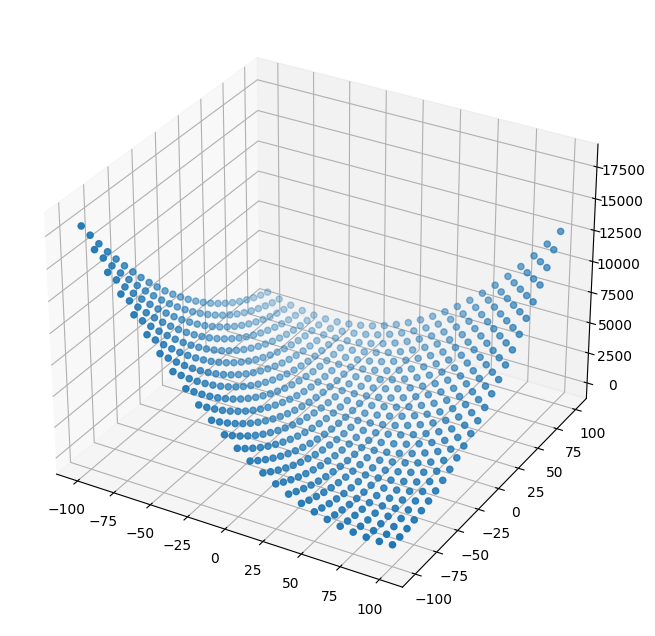

In [ ]:
plt.figure(figsize=(10,8))
ax=plt.axes(projection="3d")
ax.scatter(costo[:,0],costo[:,1],costo[:,2])
plt.show()

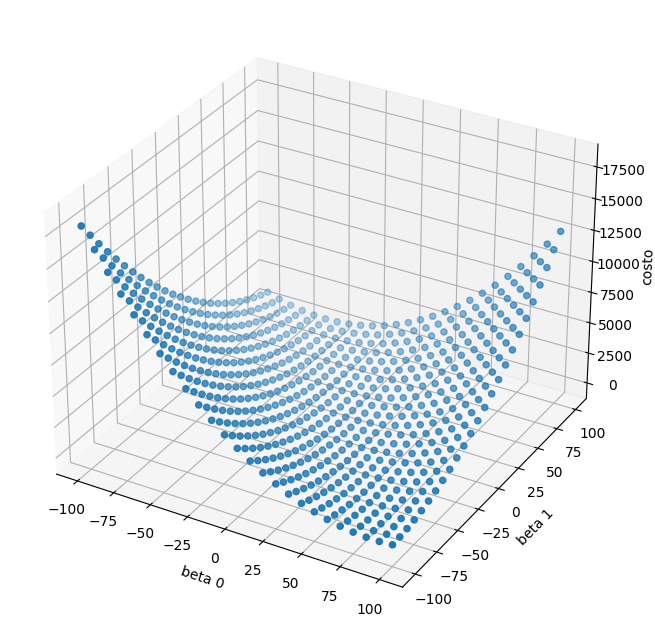

In [ ]:
plt.figure(figsize=(10,8))
ax=plt.axes(projection="3d")
ax.scatter(costo[:,0],costo[:,1],costo[:,2])
ax.set_xlabel("beta 0")
ax.set_ylabel("beta 1")
ax.set_zlabel("costo")
plt.show()

def GradienteDescendente2(x, y, beta, alpha, num_iters):
  """
  Implementa el algoritmo de gradiente descendente para encontrar los valores de los parámetros `beta` que minimizan la función de costo en regresión lineal.

  Argumentos:
    x: Un arreglo NumPy que contiene los valores de la variable independiente.
    y: Un arreglo NumPy que contiene los valores de la variable dependiente.
    beta: El valor inicial de los parámetros `beta`.
    alpha: La tasa de aprendizaje.
    num_iters: El número de iteraciones.

  Devuelve:
    beta: Los valores óptimos de los parámetros `beta`.
    jh: Un arreglo NumPy que contiene los valores de la función de costo para cada iteración.
  """

  m = len(y)  # cantidad de elementos
  jh = np.zeros(num_iters)

  for iter in range(num_iters):

    # Calcular el gradiente

    s = 0
    for i in range(m):
      s = s + ((beta[0] + beta[1] * x[i]) - y[i])

    # Actualizar el parámetro beta[0]

    t0 = beta[0] - alpha * ((1 / m) * s)

    # Calcular el gradiente

    s = 0
    for i in range(m):
      s = s + ((beta[0] + beta[1] * x[i]) - y[i]) * x[i]

    # Actualizar el parámetro beta[1]

    t1 = beta[1] - alpha * ((1 / m) * s)

    # Actualizar los parámetros beta

    beta = np.array([t0, t1])

    # Almacenar el valor de la función de costo

    jh[iter] = CalcularCosto2(x, y, beta)

  return (beta, jh)

In [ ]:
#DESARROLLAR LA GRADIENTE
def GradienteDescendente2(x,y,beta,alpha,num_iters):
  m=len(y) #cant elementos
  jh=np.zeros(num_iters)
  for iter in range(num_iters):
    s=0 #contador
    for i in range (m):
      s=s+((beta[0]+beta[1]*x[i])-y[i])
    t0=beta[0]-alpha*((1/m)*s)
    s=0
    for i in range (m):
      s=s+((beta[0]+beta[1]*x[i])-y[i])*x[i]
    t1=beta[1]-alpha*((1/m)*s)
    beta=np.array([t0,t1]) #valores optimos
    jh[iter]=CalcularCosto2(x,y,beta)
  return (beta,jh)

In [ ]:
beta_inicial=(-25,-25)
max_iters=1000
alpha=0.1
(beta,jh)=GradienteDescendente2(x,y,beta_inicial,alpha,max_iters)

NameError: ignored

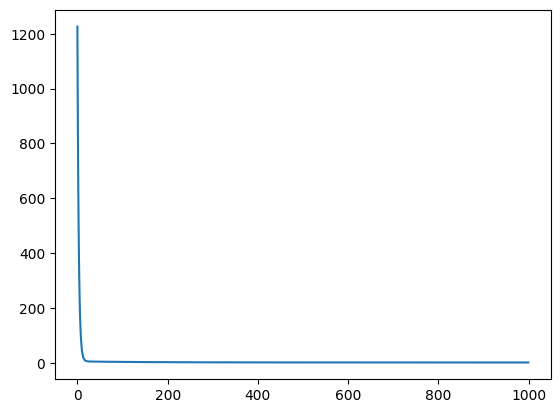

In [ ]:
plt.plot(jh)

In [ ]:
beta #punto optimo

array([ 3.33377282, 15.34351852])

In [ ]:
np.column_stack((np.ones(len(x)),x)) #array([1, 0.85]) donde 1. es la cant linea y 0.85 ubicacion del punto

array([[1.  , 0.85],
       [1.  , 0.85],
       [1.  , 0.9 ],
       [1.  , 0.75],
       [1.  , 0.9 ],
       [1.  , 1.  ],
       [1.  , 0.85],
       [1.  , 0.95],
       [1.  , 0.85],
       [1.  , 0.9 ],
       [1.  , 0.55],
       [1.  , 0.8 ],
       [1.  , 0.85],
       [1.  , 1.  ],
       [1.  , 0.7 ],
       [1.  , 0.5 ],
       [1.  , 0.7 ],
       [1.  , 0.95],
       [1.  , 0.2 ],
       [1.  , 0.65],
       [1.  , 0.75],
       [1.  , 1.  ],
       [1.  , 1.  ],
       [1.  , 1.  ],
       [1.  , 0.65],
       [1.  , 0.8 ],
       [1.  , 0.9 ],
       [1.  , 0.7 ],
       [1.  , 1.  ],
       [1.  , 0.8 ],
       [1.  , 0.3 ],
       [1.  , 0.5 ],
       [1.  , 0.7 ],
       [1.  , 0.25],
       [1.  , 0.85],
       [1.  , 0.9 ],
       [1.  , 0.9 ],
       [1.  , 0.25],
       [1.  , 0.45],
       [1.  , 0.7 ],
       [1.  , 0.65],
       [1.  , 0.7 ],
       [1.  , 0.95],
       [1.  , 0.25],
       [1.  , 0.6 ],
       [1.  , 0.2 ],
       [1.  , 0.45],
       [1.  ,

In [ ]:
np.column_stack((np.ones(len(x)),x)).dot(beta)

array([16.37576357, 16.37576357, 17.14293949, 14.84141171, 17.14293949,
       18.67729134, 16.37576357, 17.91011542, 16.37576357, 17.14293949,
       11.77270801, 15.60858764, 16.37576357, 18.67729134, 14.07423579,
       11.00553208, 14.07423579, 17.91011542,  6.40247652, 13.30705986,
       14.84141171, 18.67729134, 18.67729134, 18.67729134, 13.30705986,
       15.60858764, 17.14293949, 14.07423579, 18.67729134, 15.60858764,
        7.93682838, 11.00553208, 14.07423579,  7.16965245, 16.37576357,
       17.14293949, 17.14293949,  7.16965245, 10.23835616, 14.07423579,
       13.30705986, 14.07423579, 17.91011542,  7.16965245, 12.53988393,
        6.40247652, 10.23835616, 15.60858764, 17.91011542, 17.14293949])

In [ ]:
beta[0]

3.333772820002638

In [ ]:
beta[1]

15.343518524537393

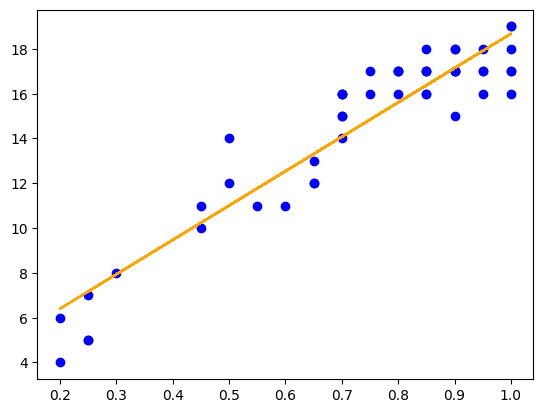

In [ ]:
yp=np.column_stack((np.ones(len(x)),x)).dot(beta)
plt.scatter(x,y,color="blue")
plt.plot(x,yp,color="orange")

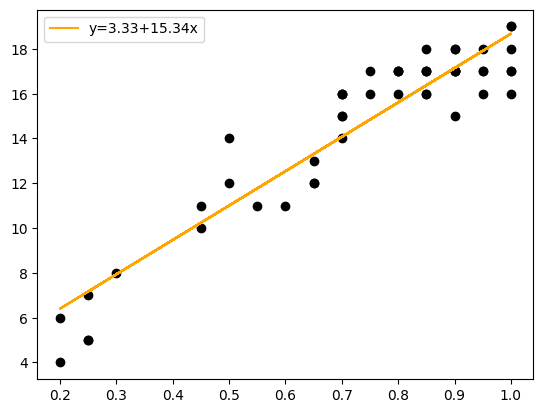

In [ ]:
yp=np.column_stack((np.ones(len(x)),x)).dot(beta)
plt.scatter(x,y,color="black")
plt.plot(x,yp,color="orange",label="y={:.2f}+{:.2f}x".format(beta[0],beta[1]))
plt.legend()